In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score



In [79]:
df = pd.read_csv("online_learning.csv")
df

,videos_watched,assignments_submitted,forum_posts,completed
0,11,6,5,yes
1,43,1,11,no
2,37,1,8,no
3,18,4,14,yes
4,6,4,15,yes
...,...,...,...,...
95,24,0,0,no
96,15,7,0,yes
97,1,7,9,no
98,17,1,9,no


In [5]:
df.isnull().sum()

,0
videos_watched,0
assignments_submitted,0
forum_posts,0
completed,0


In [80]:
df.shape

(100, 4)

In [81]:
df['completed'] = df['completed'].map({'yes': 1, 'no': 0})

print(df)


    videos_watched  assignments_submitted  forum_posts  completed
0               11                      6            5          1
1               43                      1           11          0
2               37                      1            8          0
3               18                      4           14          1
4                6                      4           15          1
..             ...                    ...          ...        ...
95              24                      0            0          0
96              15                      7            0          1
97               1                      7            9          0
98              17                      1            9          0
99              16                      3           14          0

[100 rows x 4 columns]


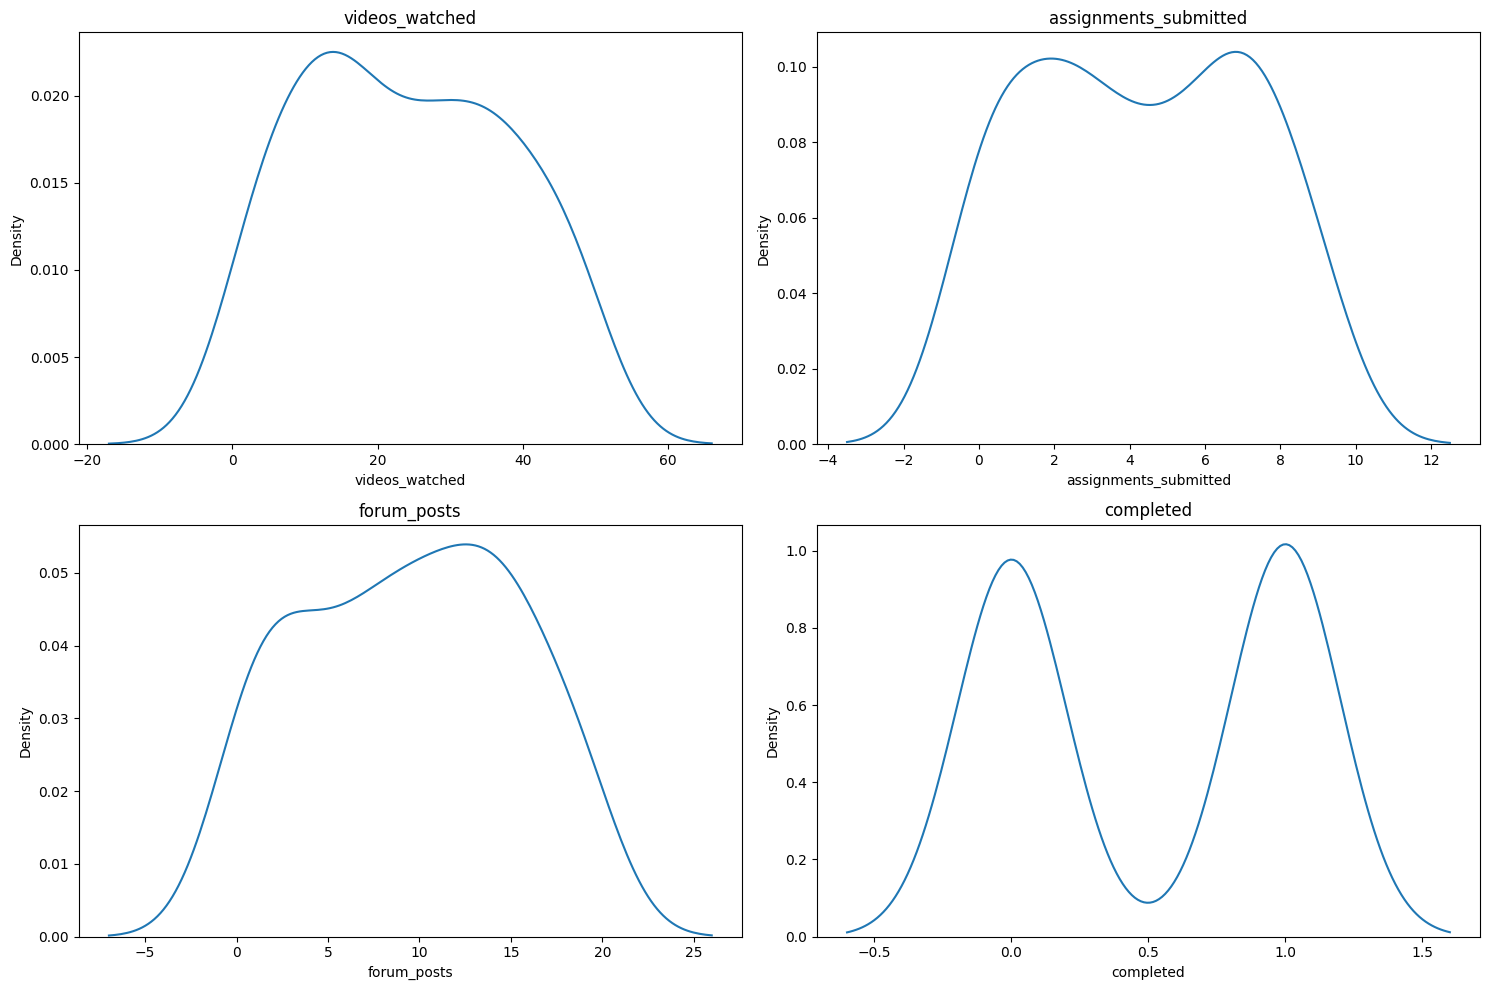

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if idx < len(axes):
        sns.kdeplot(data=df, x=column, ax=axes[idx])
        axes[idx].set_title(column)

plt.tight_layout()
plt.show()

In [83]:
y = df[['videos_watched', 'assignments_submitted', 'forum_posts']]
X = df.drop(['completed'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)


In [84]:
len(X_train)

60

In [85]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [ ]:
a = ml.predict(X_test)
a

In [87]:
ml.score(X_test, y_test)

1.0

In [91]:
from sklearn.metrics import r2_score
target_columns = ['videos_watched', 'assignments_submitted', 'forum_posts']

for i, col in enumerate(target_columns):
    r2 = r2_score(y_test[col], a[:, i])
    accuracy = r2 * 100
    print(f"Accuracy for '{col}': {accuracy:.2f}%")


Accuracy for 'videos_watched': 100.00%
Accuracy for 'assignments_submitted': 100.00%
Accuracy for 'forum_posts': 100.00%
